In [1]:
import sys
sys.path.append("/vol/bitbucket/ad6013/Research/gp-causal")
import numpy as np
import matplotlib.pyplot as plt
import gpflow 
import tensorflow as tf

In [2]:
DATA_SIZE = 1000

In [3]:
# Get the kernels ready 
kernel_lengthscale = np.random.gamma(1, 0.5)
kernel_variance_sq_exp = 1.0

sq_exp = gpflow.kernels.SquaredExponential(
    lengthscales=[kernel_lengthscale]
)
sq_exp.variance.assign(kernel_variance_sq_exp)
kernel = sq_exp

likelihood_noise = 1e-4

# Sample latents
latent = np.random.normal(0, 1, size=(DATA_SIZE, 1))

2022-10-11 17:39:43.335732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 17:39:43.342309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 17:39:43.342432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 17:39:43.343192: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
from tqdm import trange


# Sample from a GP with identity mean function
cov = kernel.K(latent)
mean = latent[:, 0]
# mean = np.zeros(DATA_SIZE)
X = np.random.multivariate_normal(
        mean=mean,
        cov=cov + likelihood_noise * np.eye(DATA_SIZE)
    )

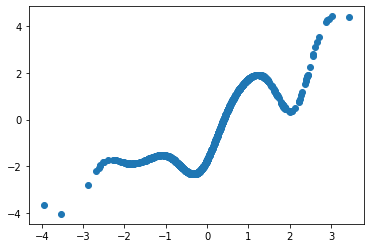

In [5]:
plt.scatter(latent, X)
plt.show()
plt.close()

In [6]:
# Get the kernels ready 
kernel_lengthscale_1 = np.random.gamma(1, 1)
kernel_lengthscale_2 = np.random.gamma(2, 5)
kernel_variance_sq_exp = 1.0


sq_exp = gpflow.kernels.SquaredExponential(
    lengthscales=[kernel_lengthscale_1, kernel_lengthscale_2]
)
sq_exp.variance.assign(kernel_variance_sq_exp)
kernel = sq_exp

likelihood_noise = 1e-4

# Sample latents
latent = np.random.normal(0, 1, size=(DATA_SIZE, 1))

full_input = np.concatenate(
    (X[:, None], latent),
    axis=1
)

In [7]:
from gpflow.models import GPR
from tqdm import trange


# Sample from a GP with identity mean function
cov = kernel.K(full_input)
mean = np.zeros(DATA_SIZE)
Y = np.random.multivariate_normal(
        mean=mean,
        cov=cov + np.eye(DATA_SIZE) * likelihood_noise
    )

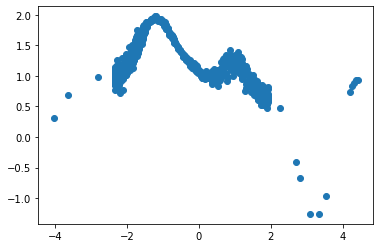

In [8]:
plt.scatter(X, Y)
plt.show()
plt.close()

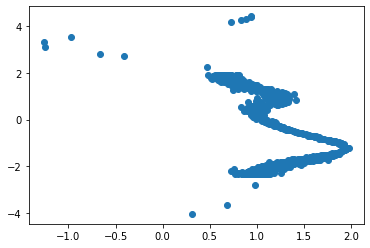

In [9]:
plt.scatter(Y, X)
plt.show()
plt.close()

In [10]:
import sys
sys.path.append("/vol/bitbucket/ad6013/Research/gp-causal")
import pickle

In [11]:
import csv
import numpy as np


file = "/vol/bitbucket/ad6013/Research/gp-causal/data/linear_pairs/files/linear_pairs.npy"

# to read file you saved
gplvm_pairs = np.load(file)

In [12]:
gplvm_pairs

array([[[ 1.79447564,  0.02154458],
        [ 0.50780059,  0.02812163],
        [-1.17186279,  0.02078275],
        ...,
        [-0.68488538, -0.08243941],
        [-3.0709137 ,  0.13105179],
        [ 0.37655315, -0.13983501]],

       [[ 0.87067304,  0.5046691 ],
        [-0.46030109, -0.31345223],
        [-0.14281023, -0.05146202],
        ...,
        [ 0.49144263,  0.26195568],
        [-0.12193111, -0.14313235],
        [ 1.47926164,  0.45627307]],

       [[-0.98239957, -1.12025607],
        [ 0.27451119,  0.19808834],
        [ 0.17351805,  0.20775072],
        ...,
        [-1.60687947, -1.94419836],
        [ 0.96037866,  0.96686644],
        [-0.91394798, -1.0137891 ]],

       ...,

       [[ 0.4043063 ,  2.14899967],
        [ 0.10469907,  0.84483056],
        [ 0.0373919 , -0.0639975 ],
        ...,
        [-0.25071488, -0.85050313],
        [-0.07129225, -0.81827437],
        [ 0.27207083,  0.73627565]],

       [[-0.04518368,  0.38034721],
        [-0.02714222, -0.06

<Figure size 432x288 with 0 Axes>

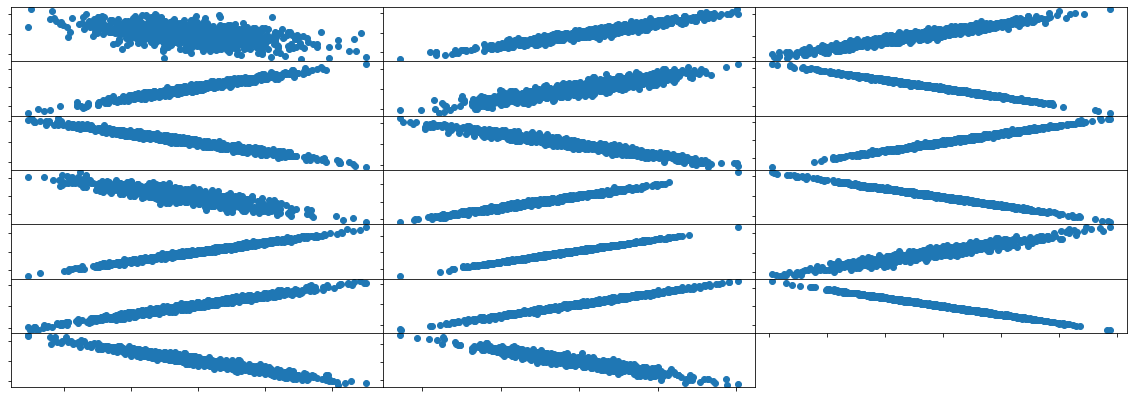

In [13]:
import matplotlib.pyplot as plt
plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20, 10))


for i in range(0, 20):
    ax = plt.subplot(10, 3, i + 1)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.scatter(gplvm_pairs[i + 51, :, 0], gplvm_pairs[i + 51, :, 1])
plt.subplots_adjust(wspace=0, hspace=0)

# plt.savefig("model_samples_2.png", bbox_inches='tight')
